In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import WindroseAxes

C:\Users\nahue\AppData\Local\Programs\Python\Python37-32\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\nahue\AppData\Local\Programs\Python\Python37-32\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\nahue\AppData\Local\Programs\Python\Python37-32\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\nahue\AppData\Local\Programs\Python\Python37-32\lib\site-packages\windrose\windrose.py:30: Matp

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return

In [3]:
columnas = ['Momento','TSS1','TSS2','TS1','TS2','TS3','TS4','TS_QG','U','DIR',
'PP', 'TA1','HR1','TA2','HR2','TA3','HR3','TA4','HR4','QG1','QG2','WET','RG','PAR',
'TSH1','HS1','GH1','Real(KH)1','Imag(KH)1','Real_T(KH)1','Imag_T(KH)1','TSH2',
'HS2','GH2','Real(KH)2','Imag(KH)2','Real_T(KH)2','Imag_T(KH)2','TSH3','HS3',
'GH3','Real(KH)3','Imag(KH)3','Real_T(KH)3','Imag_T(KH)3','TSH4','HS4','GH4',
'Real(KH)4','Imag(KH)4','Real_T(KH)4','Imag_T(KH)4','TSH5','HS5','GH5','Real(KH)5',
'Imag(KH)5','Real_T(KH)5','Imag_T(KH)5']
cant_col = len(columnas)
datos_conv = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Convencional.csv',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Convencional.csv',
        delimiter = '\t',
        decimal = '.',
        skiprows = [1,2],
        usecols = columnas,
        dtype = 'float64',
        engine = 'python'
        )

In [4]:
resumen(datos_conv)

Forma:
 (44946, 59) 

 Columnas:
 Index(['Momento', 'TSS1', 'TSS2', 'TS1', 'TS2', 'TS3', 'TS4', 'TS_QG', 'U',
       'DIR', 'PP', 'TA1', 'HR1', 'TA2', 'HR2', 'TA3', 'HR3', 'TA4', 'HR4',
       'QG1', 'QG2', 'WET', 'RG', 'PAR', 'TSH1', 'HS1', 'GH1', 'Real(KH)1',
       'Imag(KH)1', 'Real_T(KH)1', 'Imag_T(KH)1', 'TSH2', 'HS2', 'GH2',
       'Real(KH)2', 'Imag(KH)2', 'Real_T(KH)2', 'Imag_T(KH)2', 'TSH3', 'HS3',
       'GH3', 'Real(KH)3', 'Imag(KH)3', 'Real_T(KH)3', 'Imag_T(KH)3', 'TSH4',
       'HS4', 'GH4', 'Real(KH)4', 'Imag(KH)4', 'Real_T(KH)4', 'Imag_T(KH)4',
       'TSH5', 'HS5', 'GH5', 'Real(KH)5', 'Imag(KH)5', 'Real_T(KH)5',
       'Imag_T(KH)5'],
      dtype='object') 

 Tipos:
 Momento        float64
TSS1           float64
TSS2           float64
TS1            float64
TS2            float64
TS3            float64
TS4            float64
TS_QG          float64
U              float64
DIR            float64
PP             float64
TA1            float64
HR1            float64
TA2     

In [19]:
variable = 'TSS1'
dias = np.arange(0, 390, 30)
promedio = list(range(1, len(dias)))
minimos = list(range(1, len(dias)))
maximos = list(range(1, len(dias)))
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    promedio[i-1] = datos_conv[(datos_conv['Momento'] < hasta)
                              & (datos_conv['Momento'] > desde)
                              & (datos_conv[variable] < 80)
                              ][variable].mean()
    minimos[i-1] = datos_conv[(datos_conv['Momento'] < hasta)
                              & (datos_conv['Momento'] > desde)
                              & (datos_conv[variable] < 80)
                              ][variable].min()
    maximos[i-1] = datos_conv[(datos_conv['Momento'] < hasta)
                              & (datos_conv['Momento'] > desde)
                              & (datos_conv[variable] < 80)
                              ][variable].max()
print(promedio)

[19.43640316205534, 18.952866335185725, 16.76529176797499, 15.447420083391245, 12.147198451945819, 7.8561856368563685, 7.501304186735827, 8.543723441309648, 10.79521014241056, 12.719499826328587, 15.616633975481614, 17.470584958217273]


In [20]:
datos_conv[variable].mean()

14.059983012193985

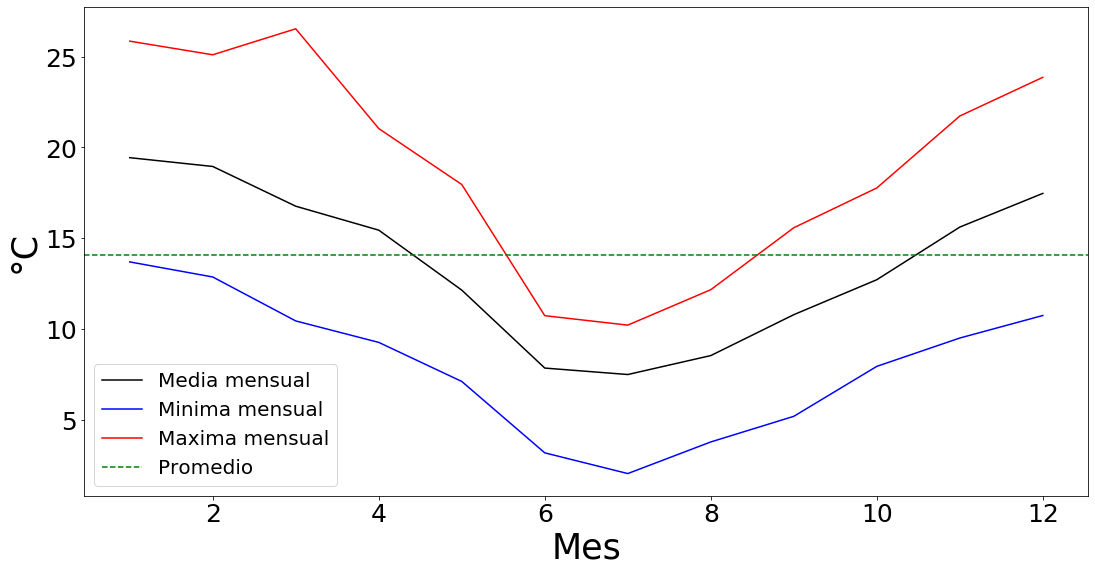

In [21]:
x = list(range(1, 13))
plt.figure(figsize = (18, 9))
plt.plot(x, promedio, color = 'black')
plt.plot(x, minimos, color = 'blue')
plt.plot(x, maximos, color = 'red')
metadata('Mes', '°C')
plt.axhline(datos_conv[variable].mean(), ls = '--', color = 'green')
plt.legend(['Media mensual', 'Minima mensual', 'Maxima mensual', 'Promedio'], fontsize= 20)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Temperatura.png')

In [28]:
variable = 'PP'
dias = np.arange(0, 390, 30)
acum = list(range(1, len(dias)))
count = list(range(1, len(dias)))
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    count[i-1] = datos_conv[(datos_conv['Momento'] < hasta)
                              & (datos_conv['Momento'] > desde)
                              & (datos_conv[variable] < 80)
                              ][variable].count()
    acum[i-1] = datos_conv[(datos_conv['Momento'] < hasta)
                              & (datos_conv['Momento'] > desde)
                              & (datos_conv[variable] < 80)
                              ][variable].sum()
    acum[i-1] = (acum[i-1]/count[i-1]) * 30*24*4
print(acum)

[3.491598993891484, 65.97465925709272, 94.74489753386594, 73.79774843641417, 31.48804128144485, 36.914146341463415, 45.77482030381623, 34.812789968652034, 85.82680097255994, 64.13026745397708, 154.62018914185637, 4.35008356545961]


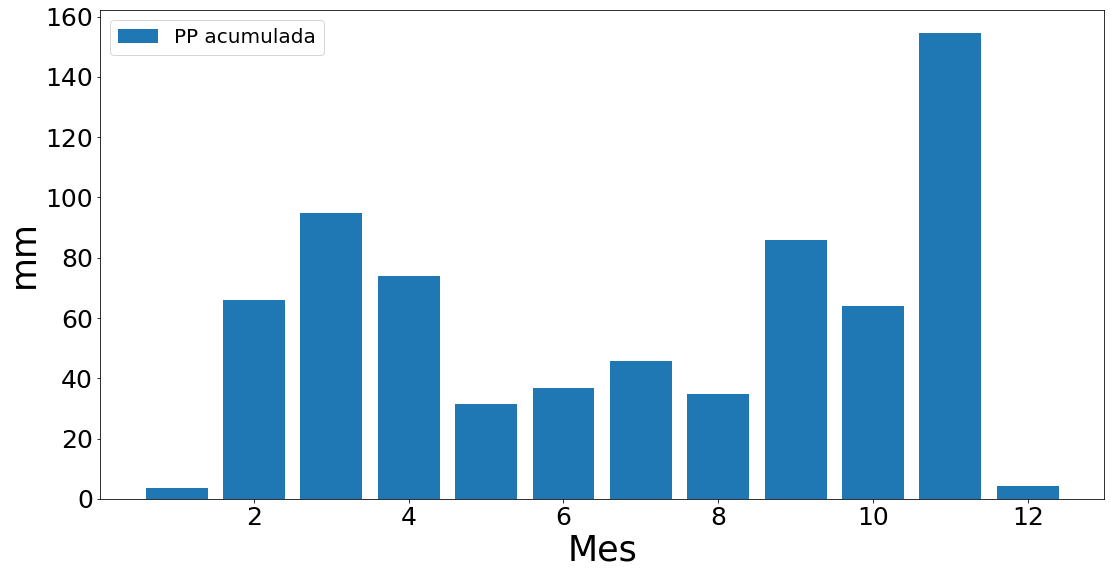

In [29]:
x = list(range(1, 13))
plt.figure(figsize = (18, 9))
plt.bar(x, acum)
metadata('Mes', 'mm')
plt.legend(['PP acumulada'], fontsize= 20)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Precipitacion.png')

In [49]:
dias = np.arange(0, 390, 30)
camino = 'C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Viento\\'
bines = [0, 2, 4, 6, 8, 10, 12, 14]
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    ws = datos_conv[(datos_conv['TSS1']<80)
                    & (datos_conv['U']>0.1)
                    & (datos_conv['Momento'] < hasta)
                    & (datos_conv['Momento'] > desde)
                   ]['U']
    wd = datos_conv[(datos_conv['TSS1']<80)
                    & (datos_conv['U']>0.1)
                    & (datos_conv['Momento'] < hasta)
                    & (datos_conv['Momento'] > desde)
                   ]['DIR']
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed = True,
           opening = 0.8, edgecolor = 'white',
           bins = bines
          )
    #ax.set_legend()
    ax.set_yticks(np.arange(0, 30, step=5))
    ax.set_yticklabels(np.arange(0, 30, step=5))
    plt.savefig(camino + str(i) + '.png')
    plt.close()

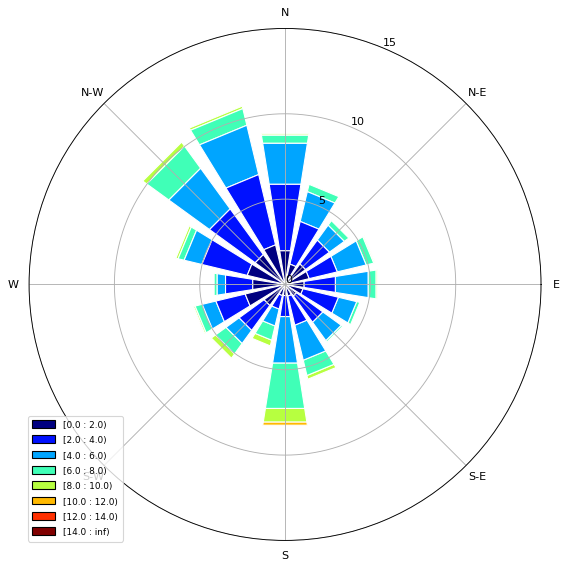

In [56]:
ws = datos_conv[(datos_conv['TSS1']<80)
                & (datos_conv['U']>0.1)
                ]['U']
wd = datos_conv[(datos_conv['TSS1']<80)
                & (datos_conv['U']>0.1)
                ]['DIR']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed = True,
        opening = 0.8, edgecolor = 'white',
        bins = bines
        )
ax.set_yticks(np.arange(0, 20, step=5))
ax.set_yticklabels(np.arange(0, 20, step=5))
ax.set_legend()
plt.savefig(camino + 'Viento.png')

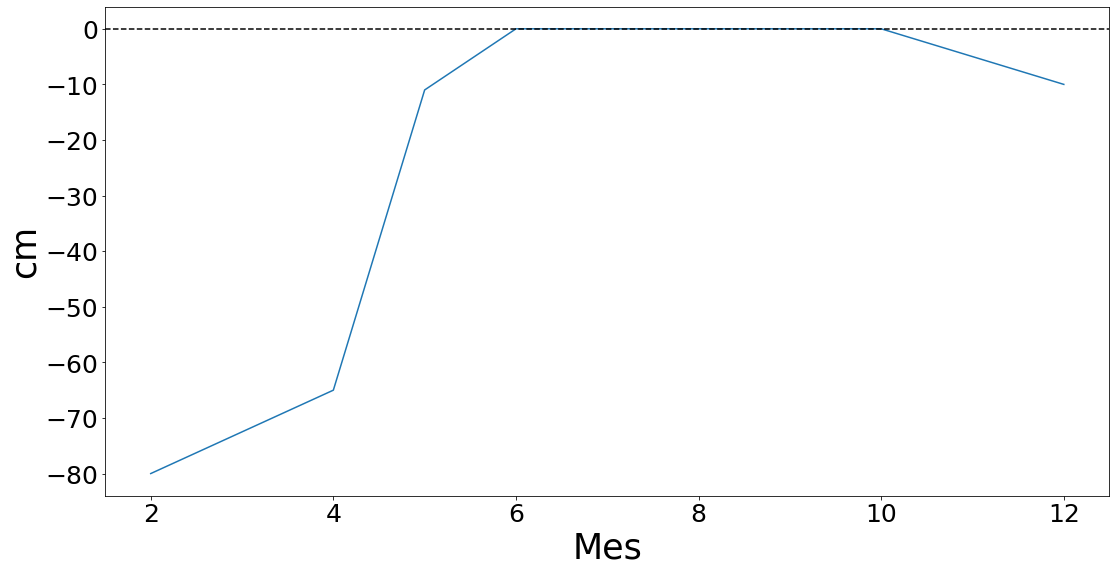

In [8]:
x = [2, 4, 5, 6, 7, 10, 12]
napa = [-80, -65, -11, 0, 0, 0, -10]
plt.figure(figsize=(18,9))
plt.plot(x, napa)
plt.axhline(0, color = 'black', ls = '--')
metadata('Mes', 'cm')
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Napa.png')

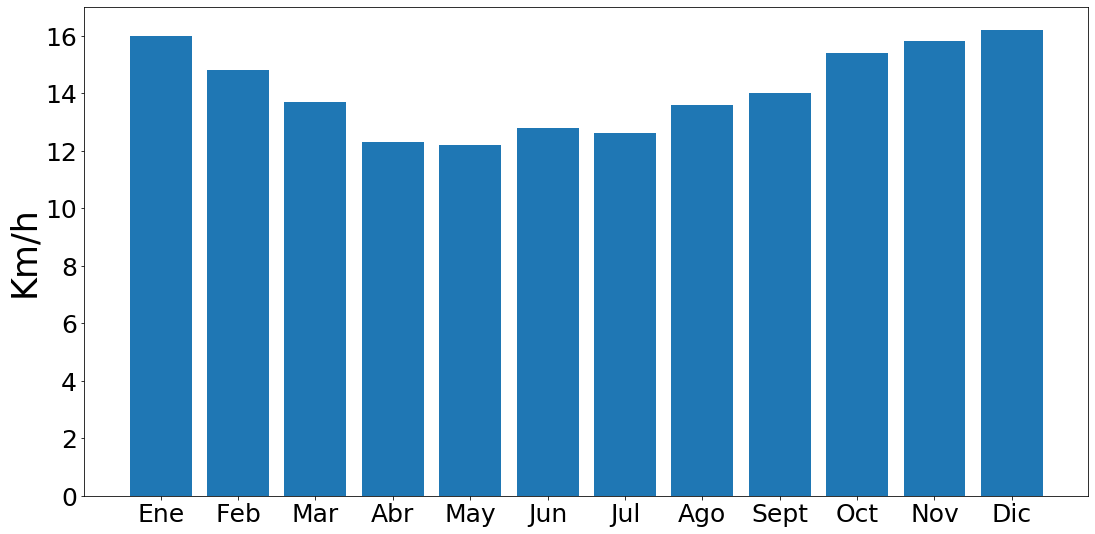

In [15]:
velocidad = [16.0, 14.8, 13.7, 12.3,
             12.2, 12.8, 12.6, 13.6,
             14.0, 15.4, 15.8, 16.2
            ]
meses = ['Ene', 'Feb', 'Mar',
         'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Sept',
         'Oct', 'Nov', 'Dic'
         ]
plt.figure(figsize=(18,9))
plt.bar(meses, velocidad)
#plt.xticks(rotation=-30)
metadata('', 'Km/h')
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Escritura\\Viento_mardel.png')